In [5]:
import pandas as pd
import numpy as np
from IPython.display import Image

path = ""
img_path = ""

## 기상청
2017~2022년 시간별 상대습도 데이터

#### 상대습도 데이터를 실효습도 데이터로 변환
B) 실효습도란 현재 + 과거습도값(가중치)을 고려 -> 실질적 건조도 파악에 용이

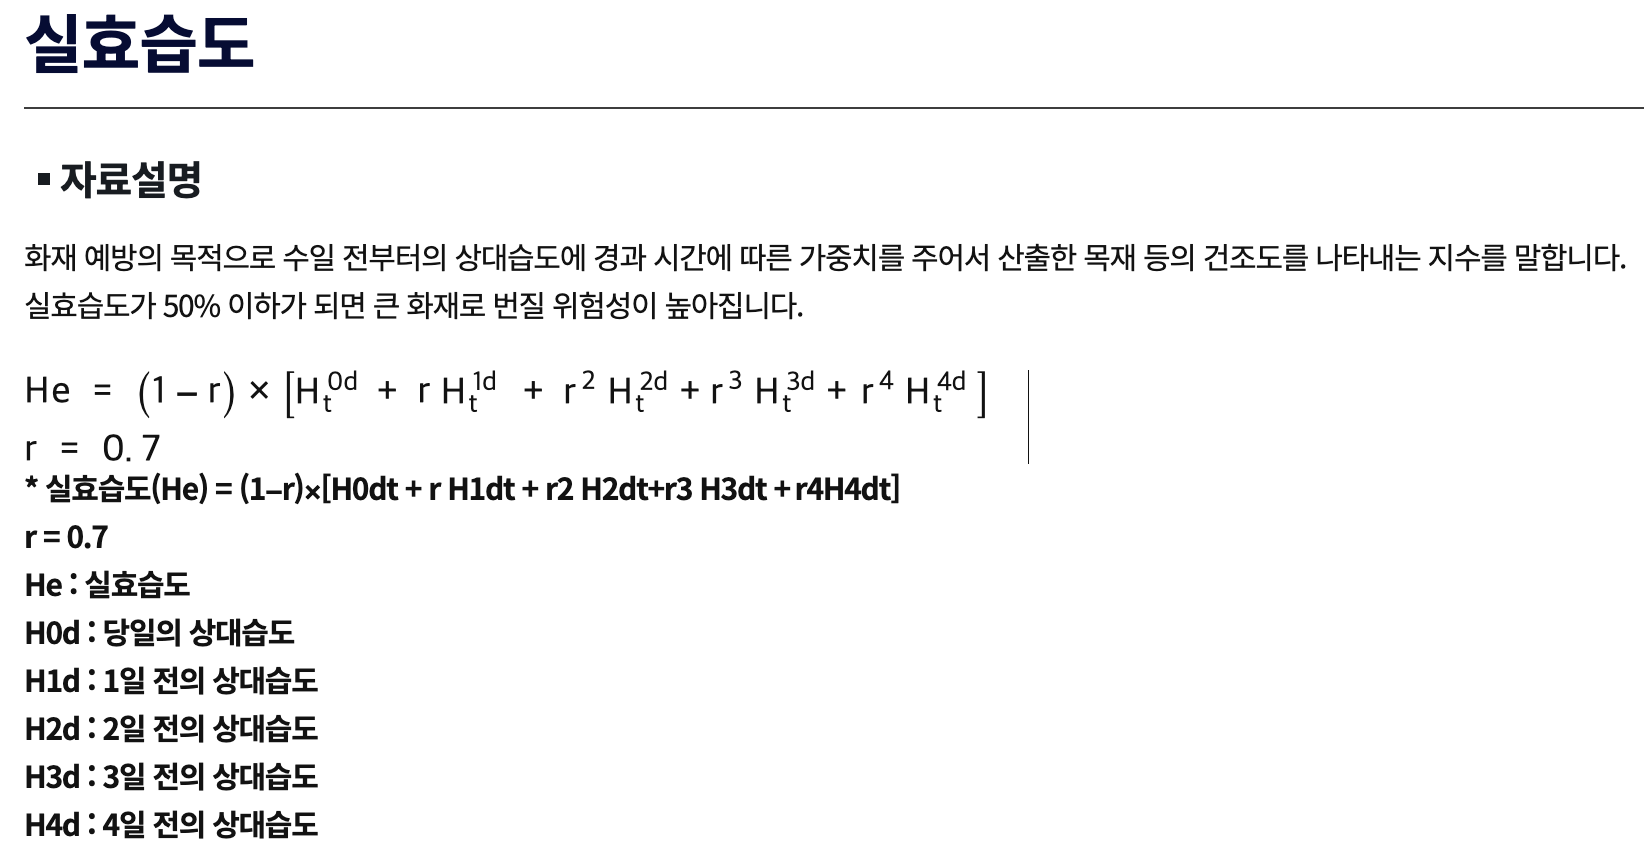

In [6]:
Image(filename = img_path +'실효습도_산식.png')

In [9]:
df = pd.read_csv(path + "상대습도_1722.csv", encoding = "cp949")
df.head()

,지점,지점명,일시,평균 이슬점온도(°C),최소 상대습도(%),최소 상대습도 시각(hhmi),평균 상대습도(%),평균 증기압(hPa)
0,108,서울,2017-01-01,-1.2,59.0,1342.0,75.9,5.6
1,108,서울,2017-01-02,1.3,57.0,1355.0,77.8,6.8
2,108,서울,2017-01-03,-4.8,38.0,1254.0,61.8,4.3
3,108,서울,2017-01-04,-4.8,31.0,1503.0,55.0,4.3
4,108,서울,2017-01-05,-5.1,42.0,943.0,52.3,4.2


In [10]:
df["평균 상대습도(%)"].values

array([75.9, 77.8, 61.8, ..., 56.3, 65.6, 65.5])

In [11]:
r = 0.7
a_values = df['평균 상대습도(%)'].rolling(5).apply(lambda x: (1 - r) * sum(x[i] * (r ** i) for i in range(5)), raw=True)
a_values[0:4] = 57.47292, 57.37625, 56.26225, 54.27375

In [12]:
a_values

0       57.472920
1       57.376250
2       56.262250
3       54.273750
4       57.619269
          ...    
2186    51.520554
2187    51.857163
2188    54.608379
2189    54.237138
2190    52.885305
Name: 평균 상대습도(%), Length: 2191, dtype: float64

In [13]:
df["실효습도"] = a_values

In [14]:
df

,지점,지점명,일시,평균 이슬점온도(°C),최소 상대습도(%),최소 상대습도 시각(hhmi),평균 상대습도(%),평균 증기압(hPa),실효습도
0,108,서울,2017-01-01,-1.2,59.0,1342.0,75.9,5.6,57.472920
1,108,서울,2017-01-02,1.3,57.0,1355.0,77.8,6.8,57.376250
2,108,서울,2017-01-03,-4.8,38.0,1254.0,61.8,4.3,56.262250
3,108,서울,2017-01-04,-4.8,31.0,1503.0,55.0,4.3,54.273750
4,108,서울,2017-01-05,-5.1,42.0,943.0,52.3,4.2,57.619269
...,...,...,...,...,...,...,...,...,...
2186,108,서울,2022-12-27,-7.5,48.0,1308.0,69.8,3.5,51.520554
2187,108,서울,2022-12-28,-10.7,39.0,1117.0,58.1,2.8,51.857163
2188,108,서울,2022-12-29,-10.8,33.0,1203.0,56.3,2.8,54.608379
2189,108,서울,2022-12-30,-7.7,36.0,1635.0,65.6,3.5,54.237138


In [15]:
import re
def date(x):
    return re.sub(r'-', '', x)

In [16]:
df['일시'] = df['일시'].apply(lambda x: date(x))

In [17]:
df

,지점,지점명,일시,평균 이슬점온도(°C),최소 상대습도(%),최소 상대습도 시각(hhmi),평균 상대습도(%),평균 증기압(hPa),실효습도
0,108,서울,20170101,-1.2,59.0,1342.0,75.9,5.6,57.472920
1,108,서울,20170102,1.3,57.0,1355.0,77.8,6.8,57.376250
2,108,서울,20170103,-4.8,38.0,1254.0,61.8,4.3,56.262250
3,108,서울,20170104,-4.8,31.0,1503.0,55.0,4.3,54.273750
4,108,서울,20170105,-5.1,42.0,943.0,52.3,4.2,57.619269
...,...,...,...,...,...,...,...,...,...
2186,108,서울,20221227,-7.5,48.0,1308.0,69.8,3.5,51.520554
2187,108,서울,20221228,-10.7,39.0,1117.0,58.1,2.8,51.857163
2188,108,서울,20221229,-10.8,33.0,1203.0,56.3,2.8,54.608379
2189,108,서울,20221230,-7.7,36.0,1635.0,65.6,3.5,54.237138


In [18]:
df2 = df[["일시", "실효습도"]]
df2

,일시,실효습도
0,20170101,57.472920
1,20170102,57.376250
2,20170103,56.262250
3,20170104,54.273750
4,20170105,57.619269
...,...,...
2186,20221227,51.520554
2187,20221228,51.857163
2188,20221229,54.608379
2189,20221230,54.237138


In [20]:
df2.to_csv(path + "실효습도_1722.csv", encoding = "cp949", index = False)